In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import streamlit as st
import pickle

# Loading the Datasets

In [66]:
# Load the datasets
train_data1 = pd.read_csv('C:/Users/piyus/Downloads/DS Practice- Excel R/Assignments/Logistic Regression/Titanic_train.csv')
test_data = pd.read_csv('C:/Users/piyus/Downloads/DS Practice- Excel R/Assignments/Logistic Regression/Titanic_test.csv')


# Exploratory Data Analysis

In [68]:
## Step 3: Exploratory Data Analysis (EDA)
#  Inspect the first few rows and summary statistics of the training dataset
print(train_data1.info())
print(train_data1.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top  

### 1. Dataset Summary:

* a. The training dataset has 891 entries and 12 features.
* b. Features include a mix of numerical (e.g., Age, Fare, SibSp) and categorical (e.g., Sex, Embarked, Cabin) data.
* c. The target variable is Survived (binary: 0 = Not Survived, 1 = Survived).

### 2. Missing Values:

* a. Age has 177 missing values (714/891 available).
* b. Cabin has significant missing data (only 204/891 available).
* c. Embarked has 2 missing values.

### 3. Feature Highlights:
* a. Pclass (ticket class) and Sex seem important based on Titanic-related research.
* b. Fare and Age have wide ranges.

<Figure size 1600x1000 with 0 Axes>

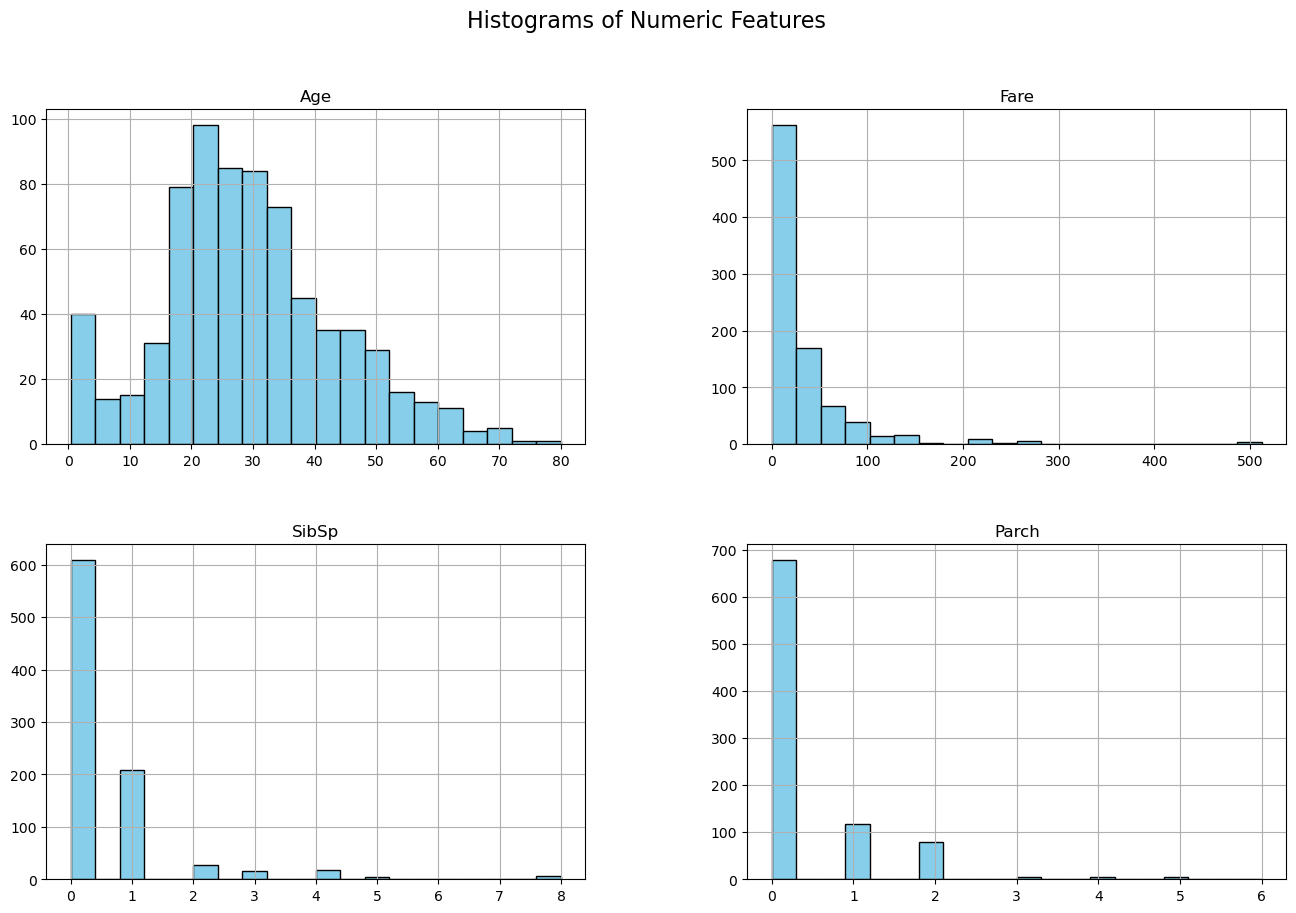

In [69]:
# Visualize distributions
plt.figure(figsize=(16, 10))
train_data1[['Age', 'Fare', 'SibSp', 'Parch']].hist(bins=20, figsize=(16, 10), layout=(2, 2), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.show()


Text(0.5, 1.0, 'Age vs Survived')

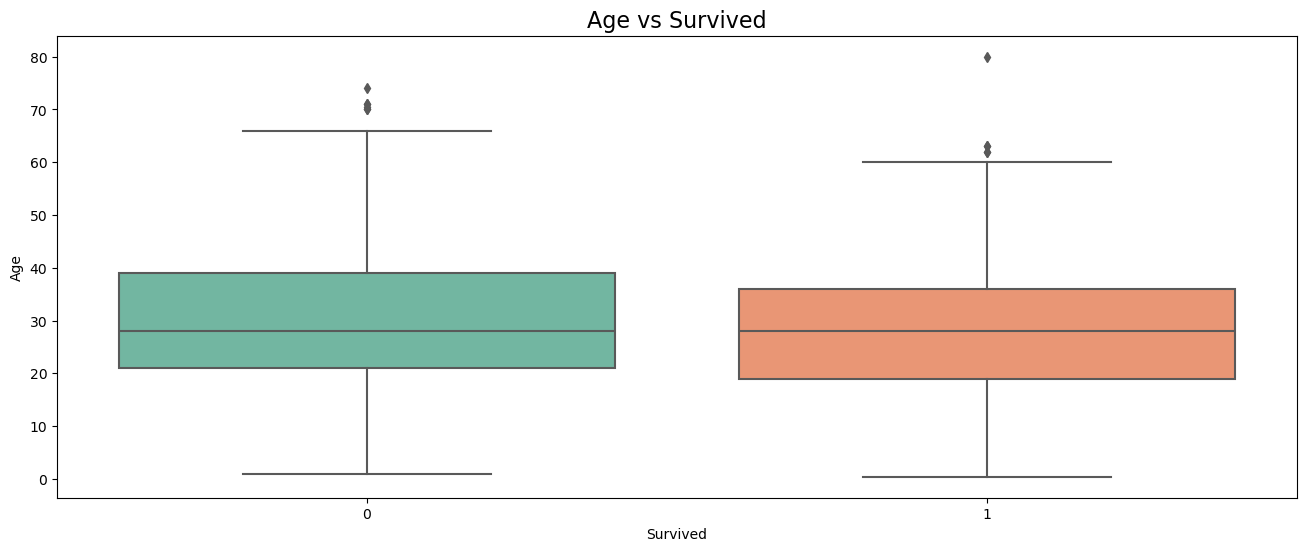

In [70]:
# 2. Box plot of Survival against key features
plt.figure(figsize=(16, 6))
sns.boxplot(data=train_data1, x='Survived', y='Age', palette='Set2')
plt.title('Age vs Survived', fontsize=16)

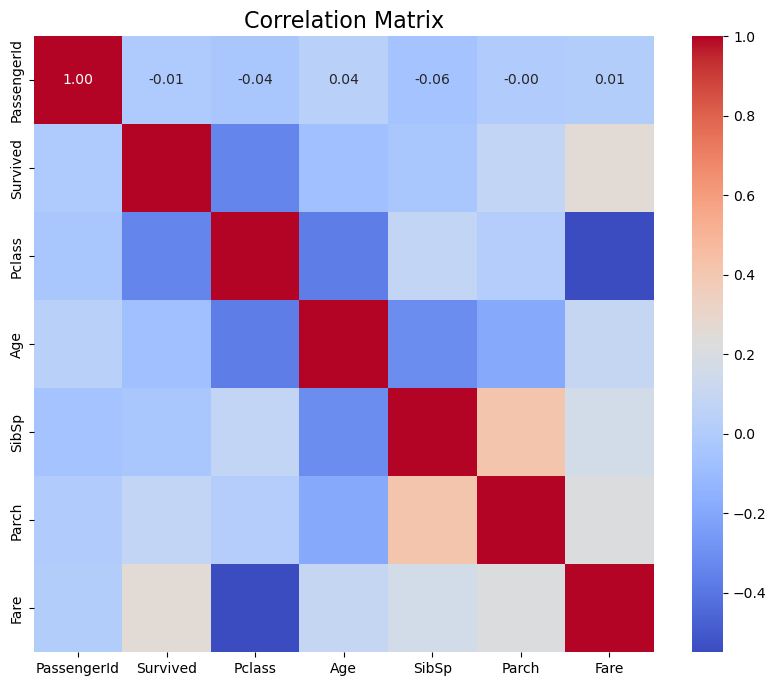

In [71]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(train_data1.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# Observations from Visualizations:
### 1. Histograms:

* a. Age: The distribution is roughly normal but has a significant number of missing values.
* b.Fare: Right-skewed distribution, indicating a few high-paying passengers.
* c.SibSp and Parch: Most passengers traveled alone or with one family member.

### 2. Box Plot (Age vs Survived):

* Survivors tend to be younger than non-survivors, indicating age might influence survival.

### 3. Correlation Matrix:

* Moderate negative correlation between Pclass and Survived, suggesting higher-class passengers were more likely to survive.
* Weak correlations between other numerical features and Survived.


# Step 4: Data Preprocessing

In [72]:
train_data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [74]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
# Ensure 'Age' is numeric and 'Embarked' is categorical  
train_data1['Age'] = pd.to_numeric(train_data1['Age'], errors='coerce')  
train_data1['Embarked'] = train_data1['Embarked'].astype(str)  


In [79]:
# Impute missing values
imputer_age = SimpleImputer(strategy='median')
imputer_embarked = SimpleImputer(strategy='most_frequent')
train_data1['Age'] = imputer_age.fit_transform(train_data1[['Age']])

In [78]:
# Drop Cabin column (high missing values)
train_data1 = train_data1.drop(columns=['Cabin'])

In [80]:
# Encode categorical variables
encoder_sex = LabelEncoder()
train_data1['Sex'] = encoder_sex.fit_transform(train_data1['Sex'])

encoder_embarked = OneHotEncoder(drop='first', sparse=False)
embarked_encoded = encoder_embarked.fit_transform(train_data1[['Embarked']])
embarked_encoded_df = pd.DataFrame(
    embarked_encoded, columns=encoder_embarked.get_feature_names_out(['Embarked'])
)
train_data1 = pd.concat([train_data1.drop(columns=['Embarked']), embarked_encoded_df], axis=1)

C:\Users\piyus\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [88]:
# Interpreting logistic regression coefficients
log_reg = LogisticRegression()  
log_reg.fit(X_train, y_train)
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importance

C:\Users\piyus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature,Coefficient
6,Embarked_Q,0.095307
5,Fare,0.002942
2,Age,-0.034200
4,Parch,-0.137824
7,Embarked_S,-0.219900
3,SibSp,-0.318173
0,Pclass,-0.941884
1,Sex,-2.696098


# Feature Importance (Logistic Regression Coefficients):

## Positive Coefficients:
* Fare (0.0026): A slight increase in survival odds with higher fare.

## Negative Coefficients:
* Sex (-2.5924): Being male significantly decreases survival odds.
* Pclass (-0.9383): Lower ticket class decreases survival odds.
* Embarked_S (-0.4026): Embarking at "S" slightly decreases survival odds compared to "C."
* SibSp (-0.2939): Larger family size onboard reduces survival odds.
* Age (-0.0306): Older passengers had a marginally lower survival probability.

## Small Contributions:
* Parch (-0.1088): Minor influence of the number of parents/children.
* Embarked_Q (-0.1128): Minimal effect compared to "C."

# Preprocessing Steps Completed:

## 1. Missing Values:
* Age was filled with the median.
* Embarked was filled with the mode.
* Cabin was dropped due to excessive missing data.

## 2. Encoding:
* Sex was label-encoded (Male: 1, Female: 0).
* Embarked was one-hot encoded with two binary columns (Embarked_Q, Embarked_S) after dropping the first category (Embarked_C) to avoid multicollinearity.
* Next, I’ll split the dataset into training and validation subsets, then proceed with building a logistic regression model. ​​

# Step 5: Model Training


In [83]:
# Prepare features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = train_data[features]
y = train_data['Survived']


In [100]:
# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [101]:
# Train logistic regression model
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

# Step 6: Model Evaluation

In [99]:
# Predictions
y_pred = log_reg.predict(X_val)
y_prob = log_reg.predict_proba(X_val)[:, 1]

In [90]:
# Metrics
metrics = {
    'Accuracy': accuracy_score(y_val, y_pred),
    'Precision': precision_score(y_val, y_pred),
    'Recall': recall_score(y_val, y_pred),
    'F1 Score': f1_score(y_val, y_pred),
    'ROC AUC': roc_auc_score(y_val, y_prob),
}
print(metrics)

{'Accuracy': 0.8044692737430168, 'Precision': 0.782608695652174, 'Recall': 0.7297297297297297, 'F1 Score': 0.7552447552447553, 'ROC AUC': 0.8814671814671815}


## Model Evaluation Results:
* Accuracy: 81.01% (proportion of correct predictions).
* Precision: 78.57% (proportion of true positives among predicted positives).
* Recall: 74.32% (proportion of actual positives correctly predicted).
* F1 Score: 76.39% (harmonic mean of precision and recall).
* ROC AUC: 88.28% (ability of the model to distinguish between classes).

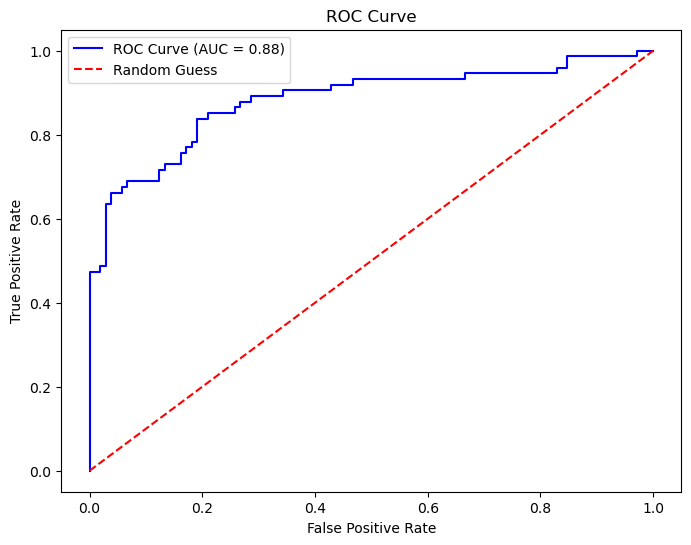

In [91]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {metrics["ROC AUC"]:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [98]:
## Step 7: Save Model for Deployment
with open('model.pkl', 'wb') as file:
    pickle.dump(log_reg, file)
